Working Title: 
Household Wealth as a Fundamental Cause of Child Health Disparities in Nigeria

In [1]:
set more off

(-set more- irrelevant in this version of Stata)


In [2]:
set maxvar 120000

In [3]:
log using "Log for MA Thesis", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health
> /Log for MA Thesis.smcl
  log type:  smcl
 opened on:  12 Mar 2025, 16:30:54


load data

In [4]:
use /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/NGKR7BDT/NGKR7BFL.DTA, clear

This dataset uses multi-stage cluster sampling, and the standard errors would be incorrect if survey weight is not applied. This will help to produce estimates that are representative of the Nigerian population and account for the complex sampling structure of the DHS dataset.

In [5]:
svyset [pw= v005], psu(v021) strata(v022)


Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>


Checking if the survey-weighted setting worked

In [6]:
svydes


Survey: Describing stage 1 sampling units

Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>

                                    Number of obs per unit
 Stratum   # units     # obs       Min      Mean       Max
----------------------------------------------------------
       1         5        90        14      18.0        23
       2        33       818        12      24.8        36
       3        22       440         6      20.0        36
       4        13       363        10      27.9        52
       5        12       207        10      17.2        29
       6        24       413         2      17.2        32
       7        24       455         4      19.0        40
       8        11       239        14      21.7        46
       9         9       208        11      23.1        42
      10        26       626         5      24.1        44
      11        10       264        14 

keep variables of interest

In [7]:
keep caseid b8 v001 v002 v003 v005 v190 v021 v022 v025 v024 v106 v151 h10 h11 h22 hw70 hw71 hw72 

In [8]:
codebook


-------------------------------------------------------------------------------
caseid                                                      case identification
-------------------------------------------------------------------------------

                  Type: String (str15)

         Unique values: 21,792                    Missing "": 0/33,924

              Examples: "286  22  3"
                        "481  53  2"
                        "665  47  2"
                        "939  17  9"


-------------------------------------------------------------------------------
v001                                                             cluster number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,1400]                      Units: 1
         Unique values: 1,389                     Missing .: 0/33,924

                  Mean: 612.956
             Std. dev.: 358.907

           Percen

         Unique values: 3                         Missing .: 23,002/33,924

            Tabulation: Freq.   Numeric  Label
                        3,606         0  no
                        7,307         1  yes
                            9         8  don't know
                       23,002         .  

-------------------------------------------------------------------------------
h11                                                       had diarrhea recently
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: H11

                 Range: [0,8]                         Units: 1
         Unique values: 3                         Missing .: 3,211/33,924

            Tabulation: Freq.   Numeric  Label
                       26,647         0  no
                        3,956         2  yes, last two weeks
                          110         8  don't know
                        3,211         .  


Since not all households in have child(ren) under 5, keep only households with child(ren) under the age of 5

In [9]:
replace hw70 = hw70 / 100
replace hw71 = hw71 / 100
replace hw72 = hw72 / 100

variable hw70 was int now float
(11,458 real changes made)
variable hw71 was int now float
(11,450 real changes made)
variable hw72 was int now float
(11,436 real changes made)



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        hw70 |     11,471   -.5566646    9.882177      -5.99      99.98
        hw71 |     11,472   -.9262099    4.300253      -5.94      99.98
        hw72 |     11,476    .3247412    7.946526      -4.99      99.98
(bin=50, start=-5.9899998, width=2.1194001)
(bin=50, start=-5.9400001, width=2.1184001)
(bin=50, start=-4.9899998, width=2.0994001)


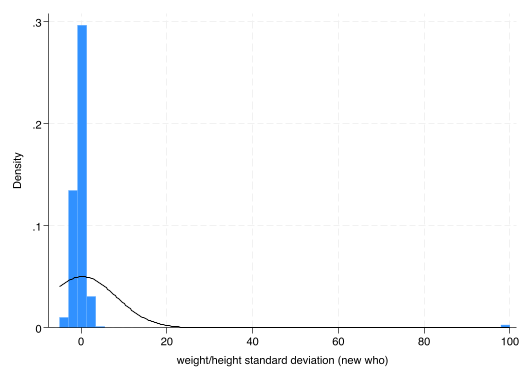

In [10]:
summarize hw70 hw71 hw72
histogram hw70, bin(50) normal
histogram hw71, bin(50) normal
histogram hw72, bin(50) normal

In [11]:
replace hw70 = . if hw70 > 6 | hw70 < -6
replace hw71 = . if hw71 > 6 | hw71 < -6
replace hw72 = . if hw72 > 6 | hw72 < -6

(107 real changes made, 107 to missing)
(19 real changes made, 19 to missing)
(71 real changes made, 71 to missing)



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        hw70 |     11,364   -1.503288    1.581818      -5.99       5.99
        hw71 |     11,453   -1.093609    1.265616      -5.94       4.41
        hw72 |     11,405   -.2956046    1.154821      -4.99       4.85
(bin=50, start=-5.9899998, width=.23959999)
(bin=50, start=-5.9400001, width=.207)
(bin=50, start=-4.9899998, width=.19679999)


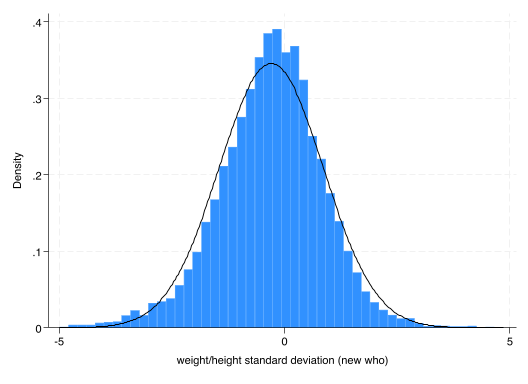

In [12]:
summarize hw70 hw71 hw72
histogram hw70, bin(50) normal
histogram hw71, bin(50) normal
histogram hw72, bin(50) normal

In [13]:
* Stunting (Binary: Stunted vs. Not Stunted)
gen stunting = .
replace stunting = 0 if hw70 >= -2  // Not Stunted
replace stunting = 1 if hw70 < -2   // Stunted
label define stunting_lbl 0 "Not Stunted" 1 "Stunted"
label values stunting stunting_lbl

(33,924 missing values generated)
(29,815 real changes made)
(4,109 real changes made)


In [14]:
* Wasting (Binary: Wasted vs. Not Wasted)
gen wasting = .
replace wasting = 0 if hw71 >= -2  // Not Wasted
replace wasting = 1 if hw71 < -2   // Wasted
label define wasting_lbl 0 "Not Wasted" 1 "Wasted"
label values wasting wasting_lbl

(33,924 missing values generated)
(31,435 real changes made)
(2,489 real changes made)


In [15]:
* Underweight (Binary: Underweight vs. Not Underweight)
gen underweight = .
replace underweight = 0 if hw72 >= -2  // Not Underweight
replace underweight = 1 if hw72 < -2   // Underweight
label define underweight_lbl 0 "Not Underweight" 1 "Underweight"
label values underweight underweight_lbl

(33,924 missing values generated)
(33,154 real changes made)
(770 real changes made)


recoding rural-urban to 0 and 1

In [16]:
gen rural_binary = .
replace rural_binary = 0 if v025 == 2
replace rural_binary = 1 if v025 == 1
label define rural_label 0 "Rural" 1 "Urban"
label values rural_binary rural_label
tab rural_binary


(33,924 missing values generated)
(22,225 real changes made)
(11,699 real changes made)

rural_binar |
          y |      Freq.     Percent        Cum.
------------+-----------------------------------
      Rural |     22,225       65.51       65.51
      Urban |     11,699       34.49      100.00
------------+-----------------------------------
      Total |     33,924      100.00


In [17]:
tab v025


    type of |
   place of |
  residence |      Freq.     Percent        Cum.
------------+-----------------------------------
      urban |     11,699       34.49       34.49
      rural |     22,225       65.51      100.00
------------+-----------------------------------
      Total |     33,924      100.00


recoding household wealth index

In [18]:
recode v190 (1 2 = 1 "poor_households") (3 = 2 "average_households") (4 5 = 3 "rich_households"), gen(household_wealth)

(25,858 differences between v190 and household_wealth)


In [19]:
tab household_wealth


    RECODE of v190 |
     (wealth index |
         combined) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
   poor_households |     15,809       46.60       46.60
average_households |      7,171       21.14       67.74
   rich_households |     10,944       32.26      100.00
-------------------+-----------------------------------
             Total |     33,924      100.00


In [20]:
label define wealth_label 1 "Poor_households" 2 "Average_Households" 3 "Rich_Households"
label values household_wealth wealth_label
tab household_wealth



    RECODE of v190 |
     (wealth index |
         combined) |      Freq.     Percent        Cum.
-------------------+-----------------------------------
   Poor_households |     15,809       46.60       46.60
Average_Households |      7,171       21.14       67.74
   Rich_Households |     10,944       32.26      100.00
-------------------+-----------------------------------
             Total |     33,924      100.00


Collapse data to household level

In [21]:
collapse (max) h10 h11 h22 stunting wasting underweight v005 v021 v022 (count) num_children = b8 ///
(first) v190 household_wealth rural_binary v024 v106, by(v001 v002)

Checking the structure of the collapsed dataset

In [22]:
list v001 v002 stunting wasting underweight num_children if _n <= 10


       +--------------------------------------------------------+
       | v001   v002   stunting   wasting   underw~t   num_ch~n |
       |--------------------------------------------------------|
    1. |    1      1          0         0          0          1 |
    2. |    1     11          0         0          0          1 |
    3. |    1     25          0         0          0          1 |
    4. |    1     35          1         0          0          1 |
    5. |    1     40          0         0          0          1 |
       |--------------------------------------------------------|
    6. |    1     64          0         0          0          1 |
    7. |    1     78          0         0          0          1 |
    8. |    1     83          0         0          0          1 |
    9. |    1     93          1         1          0          1 |
   10. |    1    117          0         0          0          2 |
       +--------------------------------------------------------+


Renaming other varibales for easy identification

In [23]:
label variable rural_binary residence_type
label variable v024 geopolitical_region
label variable v106 mother_education
label variable h10 vaccination
label variable h11 diarrhea
label variable h22 fever

In [24]:
rename rural_binary residence_type
rename v024 geopolitical_region
rename v106 mother_education
rename h10 vaccination
rename h11 diarrhea
rename h22 fever

Assigning proper labels to categorical variables for easy identification

In [26]:
label define wealth_lbl 1 "Poor" 2 "Average" 3 "Rich"
label values household_wealth wealth_lbl


In [27]:
label define educ_lbl 0 "No Education" 1 "Primary" 2 "Secondary" 3 "Higher"
label values mother_education educ_lbl

In [28]:
label define residence_lbl 0 "Rural" 1 "Urban"
label values residence_type residence_lbl

In [29]:
label define region_lbl 1 "North Central" 2 "North East" 3 "North West" 4 "South East" 5 "South South" 6 "South West"
label values geopolitical_region region_lbl

In [30]:
describe


Contains data
 Observations:        19,236                  
    Variables:            17                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v001            int     %8.0g                 cluster number
v002            int     %8.0g                 household number
vaccination     byte    %8.0g                 vaccination
diarrhea        byte    %8.0g                 diarrhea
fever           byte    %8.0g                 fever
stunting        float   %11.0g                (max) stunting
wasting         float   %10.0g                (max) wasting
underweight     float   %15.0g                (max) underweight
v005            long    %12.0g                (max) v005
v021            int     %8.0g                 (max) v021
v022            byte    %8.0g            

To confirm that each household appears once without duplicate

In [31]:
duplicates report v001 v002


Duplicates in terms of v001 v002

--------------------------------------
   Copies | Observations       Surplus
----------+---------------------------
        1 |        19236             0
--------------------------------------


This dataset uses multi-stage cluster sampling, and the standard errors would be incorrect if survey weight is not applied. This will help to produce estimates that are representative of the Nigerian population and account for the complex sampling structure of the DHS dataset. 

Reapply survey weight

In [32]:
svyset [pw= v005], psu(v021) strata(v022)


Sampling weights: v005
             VCE: linearized
     Single unit: missing
        Strata 1: v022
 Sampling unit 1: v021
           FPC 1: <zero>


In [33]:
save "recodedchildren_under5.dta", replace

file recodedchildren_under5.dta saved


Descriptive statistics

In [34]:
use /Users/johnadeleke/Desktop/Household_inequalities_and_Child_Health/recodedchildren_under5.dta, clear

In [35]:
describe


Contains data from /Users/johnadeleke/Desktop/Household_inequalities_and_Child_
> Health/recodedchildren_under5.dta
 Observations:        19,236                  
    Variables:            17                  12 Mar 2025 16:31
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
v001            int     %8.0g                 cluster number
v002            int     %8.0g                 household number
vaccination     byte    %8.0g                 vaccination
diarrhea        byte    %8.0g                 diarrhea
fever           byte    %8.0g                 fever
stunting        float   %11.0g                (max) stunting
wasting         float   %10.0g                (max) wasting
underweight     float   %15.0g                (max) underweight
v005            long    %12.0g      

In [36]:
codebook


-------------------------------------------------------------------------------
v001                                                             cluster number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,1400]                      Units: 1
         Unique values: 1,389                     Missing .: 0/19,236

                  Mean: 636.883
             Std. dev.: 379.728

           Percentiles:     10%       25%       50%       75%       90%
                            150       329       599       916      1219

-------------------------------------------------------------------------------
v002                                                           household number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,274]                       Units: 1
         Unique values: 207     

                 Label: residence_lbl

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/19,236

            Tabulation: Freq.   Numeric  Label
                       12,046         0  Rural
                        7,190         1  Urban

-------------------------------------------------------------------------------
geopolitical_region                                         geopolitical_region
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region_lbl

                 Range: [1,6]                         Units: 1
         Unique values: 6                         Missing .: 0/19,236

            Tabulation: Freq.   Numeric  Label
                        3,504         1  North Central
                        3,749         2  North East
                        5,152         3  North West
                        2,256

In [37]:
summarize stunting wasting underweight household_wealth mother_education residence_type geopolitical_region


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
    stunting |     19,236    .1629757    .3693531          0          1
     wasting |     19,236    .1054793     .307178          0          1
 underweight |     19,236    .0375338    .1900707          0          1
household_~h |     19,236    1.920566    .8845679          1          3
mother_edu~n |     19,236    1.116604     1.04799          0          3
-------------+---------------------------------------------------------
residence_~e |     19,236    .3737783    .4838184          0          1
geopolitic~n |     19,236    3.163496    1.616892          1          6


In [38]:
describe residence_type



Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
residence_type  float   %9.0g      residence_lbl
                                              residence_type


In [39]:
tabstat stunting wasting underweight household_wealth geopolitical_region, by(residence_type) statistics(mean sd count) columns(statistics)



Summary for variables: stunting wasting underweight household_wealth geopolitic
> al_region
Group variable: residence_type (residence_type)

residence_type |      Mean        SD         N
---------------+------------------------------
         Rural |  .1817201  .3856297     12046
               |   .120704  .3257965     12046
               |  .0420887  .2007998     12046
               |  1.561182  .7720958     12046
               |    2.8392  1.441988     12046
---------------+------------------------------
         Urban |  .1315716   .338048      7190
               |  .0799722   .271269      7190
               |  .0299026  .1703306      7190
               |   2.52267  .7181649      7190
               |  3.706815  1.743456      7190
---------------+------------------------------
         Total |  .1629757  .3693531     19236
               |  .1054793   .307178     19236
               |  .0375338  .1900707     19236
               |  1.920566  .8845679     19236
            

Does household wealth impact each child health outcome? Association?

In [40]:
tab stunting household_wealth, chi2
tab wasting household_wealth, chi2
tab underweight household_wealth, chi2


     (max) |     (first) household_wealth
  stunting |      Poor    Average       Rich |     Total
-----------+---------------------------------+----------
         0 |     6,661      3,353      6,087 |    16,101 
         1 |     1,689        711        735 |     3,135 
-----------+---------------------------------+----------
     Total |     8,350      4,064      6,822 |    19,236 

          Pearson chi2(2) = 251.3893   Pr = 0.000

     (max) |     (first) household_wealth
   wasting |      Poor    Average       Rich |     Total
-----------+---------------------------------+----------
         0 |     7,198      3,639      6,370 |    17,207 
         1 |     1,152        425        452 |     2,029 
-----------+---------------------------------+----------
     Total |     8,350      4,064      6,822 |    19,236 

          Pearson chi2(2) = 204.6564   Pr = 0.000

     (max) |
underweigh |     (first) household_wealth
         t |      Poor    Average       Rich |     Total
---------

With p-value less than 0.05, household wealth is significantly asscociated with stunting, wasting, and underweight. While stunting and wasting have strong association with household wealth, underweight is relatively weaker (34.393). 

Logistic regression for each dependent variable

In [41]:
logit stunting i.household_wealth, or


Iteration 0:  Log likelihood = -8551.7763  
Iteration 1:  Log likelihood = -8422.5142  
Iteration 2:  Log likelihood = -8420.3499  
Iteration 3:  Log likelihood = -8420.3485  
Iteration 4:  Log likelihood = -8420.3485  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(2)    = 262.86
                                                        Prob > chi2   = 0.0000
Log likelihood = -8420.3485                             Pseudo R2     = 0.0154

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .8362687    .041367    -3.61   0.000     .7589971     .921407
       Rich  |   .4762049   .0226737   -15.58   0.000     .4337758     .522784
             |
       _cons |   .2535655   .0069079

In [42]:
logit wasting i.household_wealth, or


Iteration 0:  Log likelihood = -6481.7258  
Iteration 1:  Log likelihood = -6378.0914  
Iteration 2:  Log likelihood = -6375.4966  
Iteration 3:  Log likelihood = -6375.4938  
Iteration 4:  Log likelihood = -6375.4938  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(2)    = 212.46
                                                        Prob > chi2   = 0.0000
Log likelihood = -6375.4938                             Pseudo R2     = 0.0164

------------------------------------------------------------------------------
     wasting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .7297368   .0439949    -5.23   0.000     .6484081    .8212664
       Rich  |   .4433619   .0257622   -14.00   0.000     .3956381    .4968424
             |
       _cons |   .1600445   .0050787

In [43]:
logit underweight i.household_wealth, or


Iteration 0:  Log likelihood = -3078.2524  
Iteration 1:  Log likelihood = -3060.8747  
Iteration 2:  Log likelihood = -3060.6223  
Iteration 3:  Log likelihood = -3060.6223  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(2)    =  35.26
                                                        Prob > chi2   = 0.0000
Log likelihood = -3060.6223                             Pseudo R2     = 0.0057

------------------------------------------------------------------------------
 underweight | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .8104583   .0793168    -2.15   0.032     .6690006    .9818269
       Rich  |   .5911103   .0535703    -5.80   0.000     .4949108    .7060087
             |
       _cons |   .0479418    .002511   -58.00   0.000     .0432644    .0531248
-

Adjusted model with covariates

In [44]:
logit stunting i.household_wealth i.mother_education i.residence_type i.geopolitical_region, or



Iteration 0:  Log likelihood = -8551.7763  
Iteration 1:  Log likelihood =   -8324.85  
Iteration 2:  Log likelihood = -8316.7036  
Iteration 3:  Log likelihood = -8316.6728  
Iteration 4:  Log likelihood = -8316.6728  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(11)   = 470.21
                                                        Prob > chi2   = 0.0000
Log likelihood = -8316.6728                             Pseudo R2     = 0.0275

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   1.036542   .0563805     0.66   0.509     .9317243    1.153151
       Rich  |   .7479092   .0486728    -4.46   0.000     .6583456    .8496573
             |
mother_edu~n |
    Primary  |   .962

In [45]:
logit wasting i.household_wealth i.mother_education i.residence_type i.geopolitical_region, or


Iteration 0:  Log likelihood = -6481.7258  
Iteration 1:  Log likelihood =  -6280.678  
Iteration 2:  Log likelihood = -6271.0565  
Iteration 3:  Log likelihood = -6271.0198  
Iteration 4:  Log likelihood = -6271.0198  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(11)   = 421.41
                                                        Prob > chi2   = 0.0000
Log likelihood = -6271.0198                             Pseudo R2     = 0.0325

------------------------------------------------------------------------------
     wasting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .9912076   .0656196    -0.13   0.894       .87059    1.128536
       Rich  |    .782622   .0628438    -3.05   0.002     .6686539    .9160154
             |
mother_edu~n |
    Primary  |   .720

In [46]:
logit underweight i.household_wealth i.mother_education i.residence_type i.geopolitical_region, or


Iteration 0:  Log likelihood = -3078.2524  
Iteration 1:  Log likelihood =  -3040.835  
Iteration 2:  Log likelihood = -3039.6909  
Iteration 3:  Log likelihood = -3039.6894  
Iteration 4:  Log likelihood = -3039.6894  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(11)   =  77.13
                                                        Prob > chi2   = 0.0000
Log likelihood = -3039.6894                             Pseudo R2     = 0.0125

------------------------------------------------------------------------------
 underweight | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   1.028292   .1100325     0.26   0.794     .8337459    1.268234
       Rich  |   .9047459   .1145332    -0.79   0.429     .7059464    1.159529
             |
mother_edu~n |
    Primary  |   .736

2-way Interaction

Tesing whether the effect of household wealth on the child health outcomes differs between rural and urban areas, controlling for region

In [48]:
logit stunting i.household_wealth##i.residence_type i.geopolitical_region, or


Iteration 0:  Log likelihood = -8551.7763  
Iteration 1:  Log likelihood = -8371.3002  
Iteration 2:  Log likelihood = -8367.4146  
Iteration 3:  Log likelihood = -8367.4111  
Iteration 4:  Log likelihood = -8367.4111  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(10)   = 368.73
                                                        Prob > chi2   = 0.0000
Log likelihood = -8367.4111                             Pseudo R2     = 0.0216

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .9519847   .0588917    -0.80   0.426     .8432823    1.074699
       Rich  |   .6144336   .0496171    -6.03   0.000     .5244913    .7197998
             |
residence_~e |
      Urban  |    .97

In [49]:
logit wasting i.household_wealth##i.residence_type i.geopolitical_region, or


Iteration 0:  Log likelihood = -6481.7258  
Iteration 1:  Log likelihood = -6314.5433  
Iteration 2:  Log likelihood = -6308.1602  
Iteration 3:  Log likelihood = -6308.1485  
Iteration 4:  Log likelihood = -6308.1485  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(10)   = 347.15
                                                        Prob > chi2   = 0.0000
Log likelihood = -6308.1485                             Pseudo R2     = 0.0268

------------------------------------------------------------------------------
     wasting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .8195034   .0624126    -2.61   0.009      .705869    .9514313
       Rich  |   .6039157    .059924    -5.08   0.000     .4971818     .733563
             |
residence_~e |
      Urban  |   .789

In [50]:
logit underweight i.household_wealth##i.residence_type i.geopolitical_region, or


Iteration 0:  Log likelihood = -3078.2524  
Iteration 1:  Log likelihood = -3045.8569  
Iteration 2:  Log likelihood = -3044.9613  
Iteration 3:  Log likelihood = -3044.9601  
Iteration 4:  Log likelihood = -3044.9601  

Logistic regression                                     Number of obs = 19,236
                                                        LR chi2(10)   =  66.58
                                                        Prob > chi2   = 0.0000
Log likelihood = -3044.9601                             Pseudo R2     = 0.0108

------------------------------------------------------------------------------
 underweight | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   .9263909   .1125365    -0.63   0.529     .7301156     1.17543
       Rich  |   .8211131    .122652    -1.32   0.187     .6127124    1.100397
             |
residence_~e |
      Urban  |   .837

Within region analysis

In [51]:
levelsof geopolitical_region, local(regions)
foreach r of local regions {
    logit stunting i.household_wealth##i.residence_type if geopolitical_region == `r', or
    logit wasting i.household_wealth##i.residence_type if geopolitical_region == `r', or
    logit underweight i.household_wealth##i.residence_type if geopolitical_region == `r', or
}


1 2 3 4 5 6

Iteration 0:  Log likelihood = -1366.1645  
Iteration 1:  Log likelihood = -1344.5779  
Iteration 2:  Log likelihood = -1344.1157  
Iteration 3:  Log likelihood = -1344.1153  
Iteration 4:  Log likelihood = -1344.1153  

Logistic regression                                     Number of obs =  3,504
                                                        LR chi2(5)    =  44.10
                                                        Prob > chi2   = 0.0000
Log likelihood = -1344.1153                             Pseudo R2     = 0.0161

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |    .721174   .0987063    -2.39   0.017     .5514892    .9430683
       Rich  |   .5073271   .0907207    -3.79   0.000      .357335    .7202788
             |
residence_~e |
      Urb


Iteration 0:  Log likelihood = -2694.9527  
Iteration 1:  Log likelihood = -2681.0198  
Iteration 2:  Log likelihood = -2680.9389  
Iteration 3:  Log likelihood = -2680.9389  

Logistic regression                                     Number of obs =  5,152
                                                        LR chi2(5)    =  28.03
                                                        Prob > chi2   = 0.0000
Log likelihood = -2680.9389                             Pseudo R2     = 0.0052

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   1.046219   .1125691     0.42   0.675     .8472987     1.29184
       Rich  |   .7739437   .1367017    -1.45   0.147     .5474716      1.0941
             |
residence_~e |
      Urban  |   .9265838   .1322596    -0.53   0.593     .700462

Iteration 0:  Log likelihood = -733.50093  
Iteration 1:  Log likelihood = -718.44721  
Iteration 2:  Log likelihood = -717.88314  
Iteration 3:  Log likelihood =  -717.8818  
Iteration 4:  Log likelihood =  -717.8818  

Logistic regression                                     Number of obs =  2,079
                                                        LR chi2(5)    =  31.24
                                                        Prob > chi2   = 0.0000
Log likelihood = -717.8818                              Pseudo R2     = 0.0213

------------------------------------------------------------------------------
    stunting | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
household_~h |
    Average  |   1.190248   .2408639     0.86   0.389     .8005425    1.769662
       Rich  |   .6930091   .1443004    -1.76   0.078      .460786    1.042266
             |
residence_~e |
      Urban  |   1.010

log close